In [ ]:
import tensorflow as tf


In [ ]:
# Install TensorFlow with GPU support
!pip install tensorflow-gpu


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf

# Check TensorFlow version
print("TensorFlow version:", tf.__version__)

# List physical devices
gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available:", len(gpus))

if gpus:
    for gpu in gpus:
        print(f"GPU: {gpu}")
else:
    print("No GPU found")


TensorFlow version: 2.15.0
Num GPUs Available: 1
GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [ ]:
!nvidia-smi


Sun Jul 14 15:38:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8              11W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
100% 2.70G/2.70G [02:05<00:00, 24.5MB/s]
100% 2.70G/2.70G [02:05<00:00, 23.1MB/s]


In [ ]:
import zipfile

# Path to the zip file
zip_file_path = '/content/new-plant-diseases-dataset.zip'

# Open the zip file in read mode
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents of zip file to the current directory
    zip_ref.extractall('/content')

print('Files extracted successfully')


Files extracted successfully


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:

training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
cnn = tf.keras.models.Sequential()

In [ ]:

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:

cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [ ]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [ ]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [ ]:
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 [==============================] - 170s 72ms/step - loss: 1.4254 - accuracy: 0.5847 - val_loss: 0.5967 - val_accuracy: 0.8170
Epoch 2/10
2197/2197 [==============================] - 165s 75ms/step - loss: 0.4591 - accuracy: 0.8534 - val_loss: 0.3228 - val_accuracy: 0.8973
Epoch 3/10
2197/2197 [==============================] - 156s 71ms/step - loss: 0.2851 - accuracy: 0.9090 - val_loss: 0.2184 - val_accuracy: 0.9286
Epoch 4/10
2197/2197 [==============================] - 157s 71ms/step - loss: 0.1978 - accuracy: 0.9358 - val_loss: 0.2087 - val_accuracy: 0.9331
Epoch 5/10
2197/2197 [==============================] - 154s 70ms/step - loss: 0.1481 - accuracy: 0.9511 - val_loss: 0.1659 - val_accuracy: 0.9475
Epoch 6/10
2197/2197 [==============================] - 154s 70ms/step - loss: 0.1130 - accuracy: 0.9628 - val_loss: 0.1424 - val_accuracy: 0.9564
Epoch 7/10
2197/2197 [==============================] - 154s 70ms/step - loss: 0.0913 - accuracy: 0.9699 - val_loss: 0

In [ ]:
print("More to go")

More to go


In [ ]:
### Model Evaluation on training set


#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 [==============================] - 49s 22ms/step - loss: 0.0339 - accuracy: 0.9886
Training accuracy: 0.9885767102241516


In [ ]:

#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 [==============================] - 13s 23ms/step - loss: 0.1357 - accuracy: 0.9599
Validation accuracy: 0.9598793387413025


In [ ]:
### Saving Model

cnn.save('trained_plant_disease_model.keras')



In [ ]:

training_history.history #Return Dictionary of history

{'loss': [1.425355076789856,
  0.45910927653312683,
  0.2851276397705078,
  0.19776204228401184,
  0.14811499416828156,
  0.11297226697206497,
  0.09126624464988708,
  0.07544726133346558,
  0.07129126787185669,
  0.06096641719341278],
 'accuracy': [0.5846503973007202,
  0.8533608317375183,
  0.9089550971984863,
  0.9358276128768921,
  0.9510775804519653,
  0.9628422856330872,
  0.9698840379714966,
  0.9752329587936401,
  0.9767977595329285,
  0.9803115725517273],
 'val_loss': [0.596743106842041,
  0.3228228986263275,
  0.21837641298770905,
  0.20874100923538208,
  0.16593557596206665,
  0.142419695854187,
  0.15648667514324188,
  0.1627262532711029,
  0.17736713588237762,
  0.1357157826423645],
 'val_accuracy': [0.8169815540313721,
  0.8972797393798828,
  0.928579568862915,
  0.9330753684043884,
  0.9475301504135132,
  0.956407904624939,
  0.9527657628059387,
  0.9549852013587952,
  0.9501479864120483,
  0.9598793387413025]}

In [ ]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
    # print(training_history.history.keys())

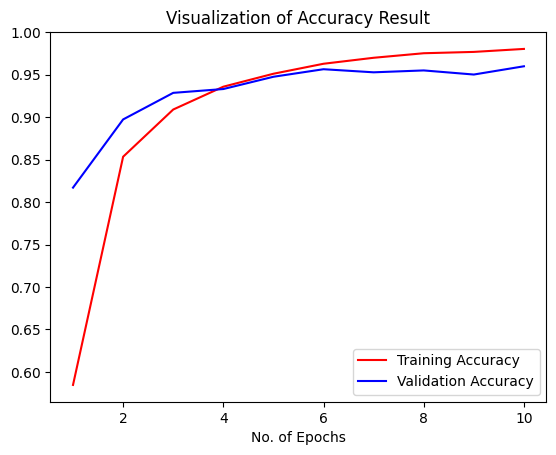

In [ ]:
### Accuracy Visualization

epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [ ]:
### Some other metrics for model evaluation

In [ ]:
class_name = validation_set.class_names

In [ ]:

test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [ ]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1) #axis=1 vertically column wise index pass garna

17572/17572 [==============================] - 48s 3ms/step


In [ ]:

true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [ ]:

Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [ ]:
#Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.93      0.94       504
                                 Apple___Black_rot       0.99      0.96      0.97       497
                          Apple___Cedar_apple_rust       0.95      0.99      0.97       440
                                   Apple___healthy       0.95      0.96      0.96       502
                               Blueberry___healthy       0.98      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.96      0.99      0.97       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.91      0.93      0.92       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.93      0.96      0.

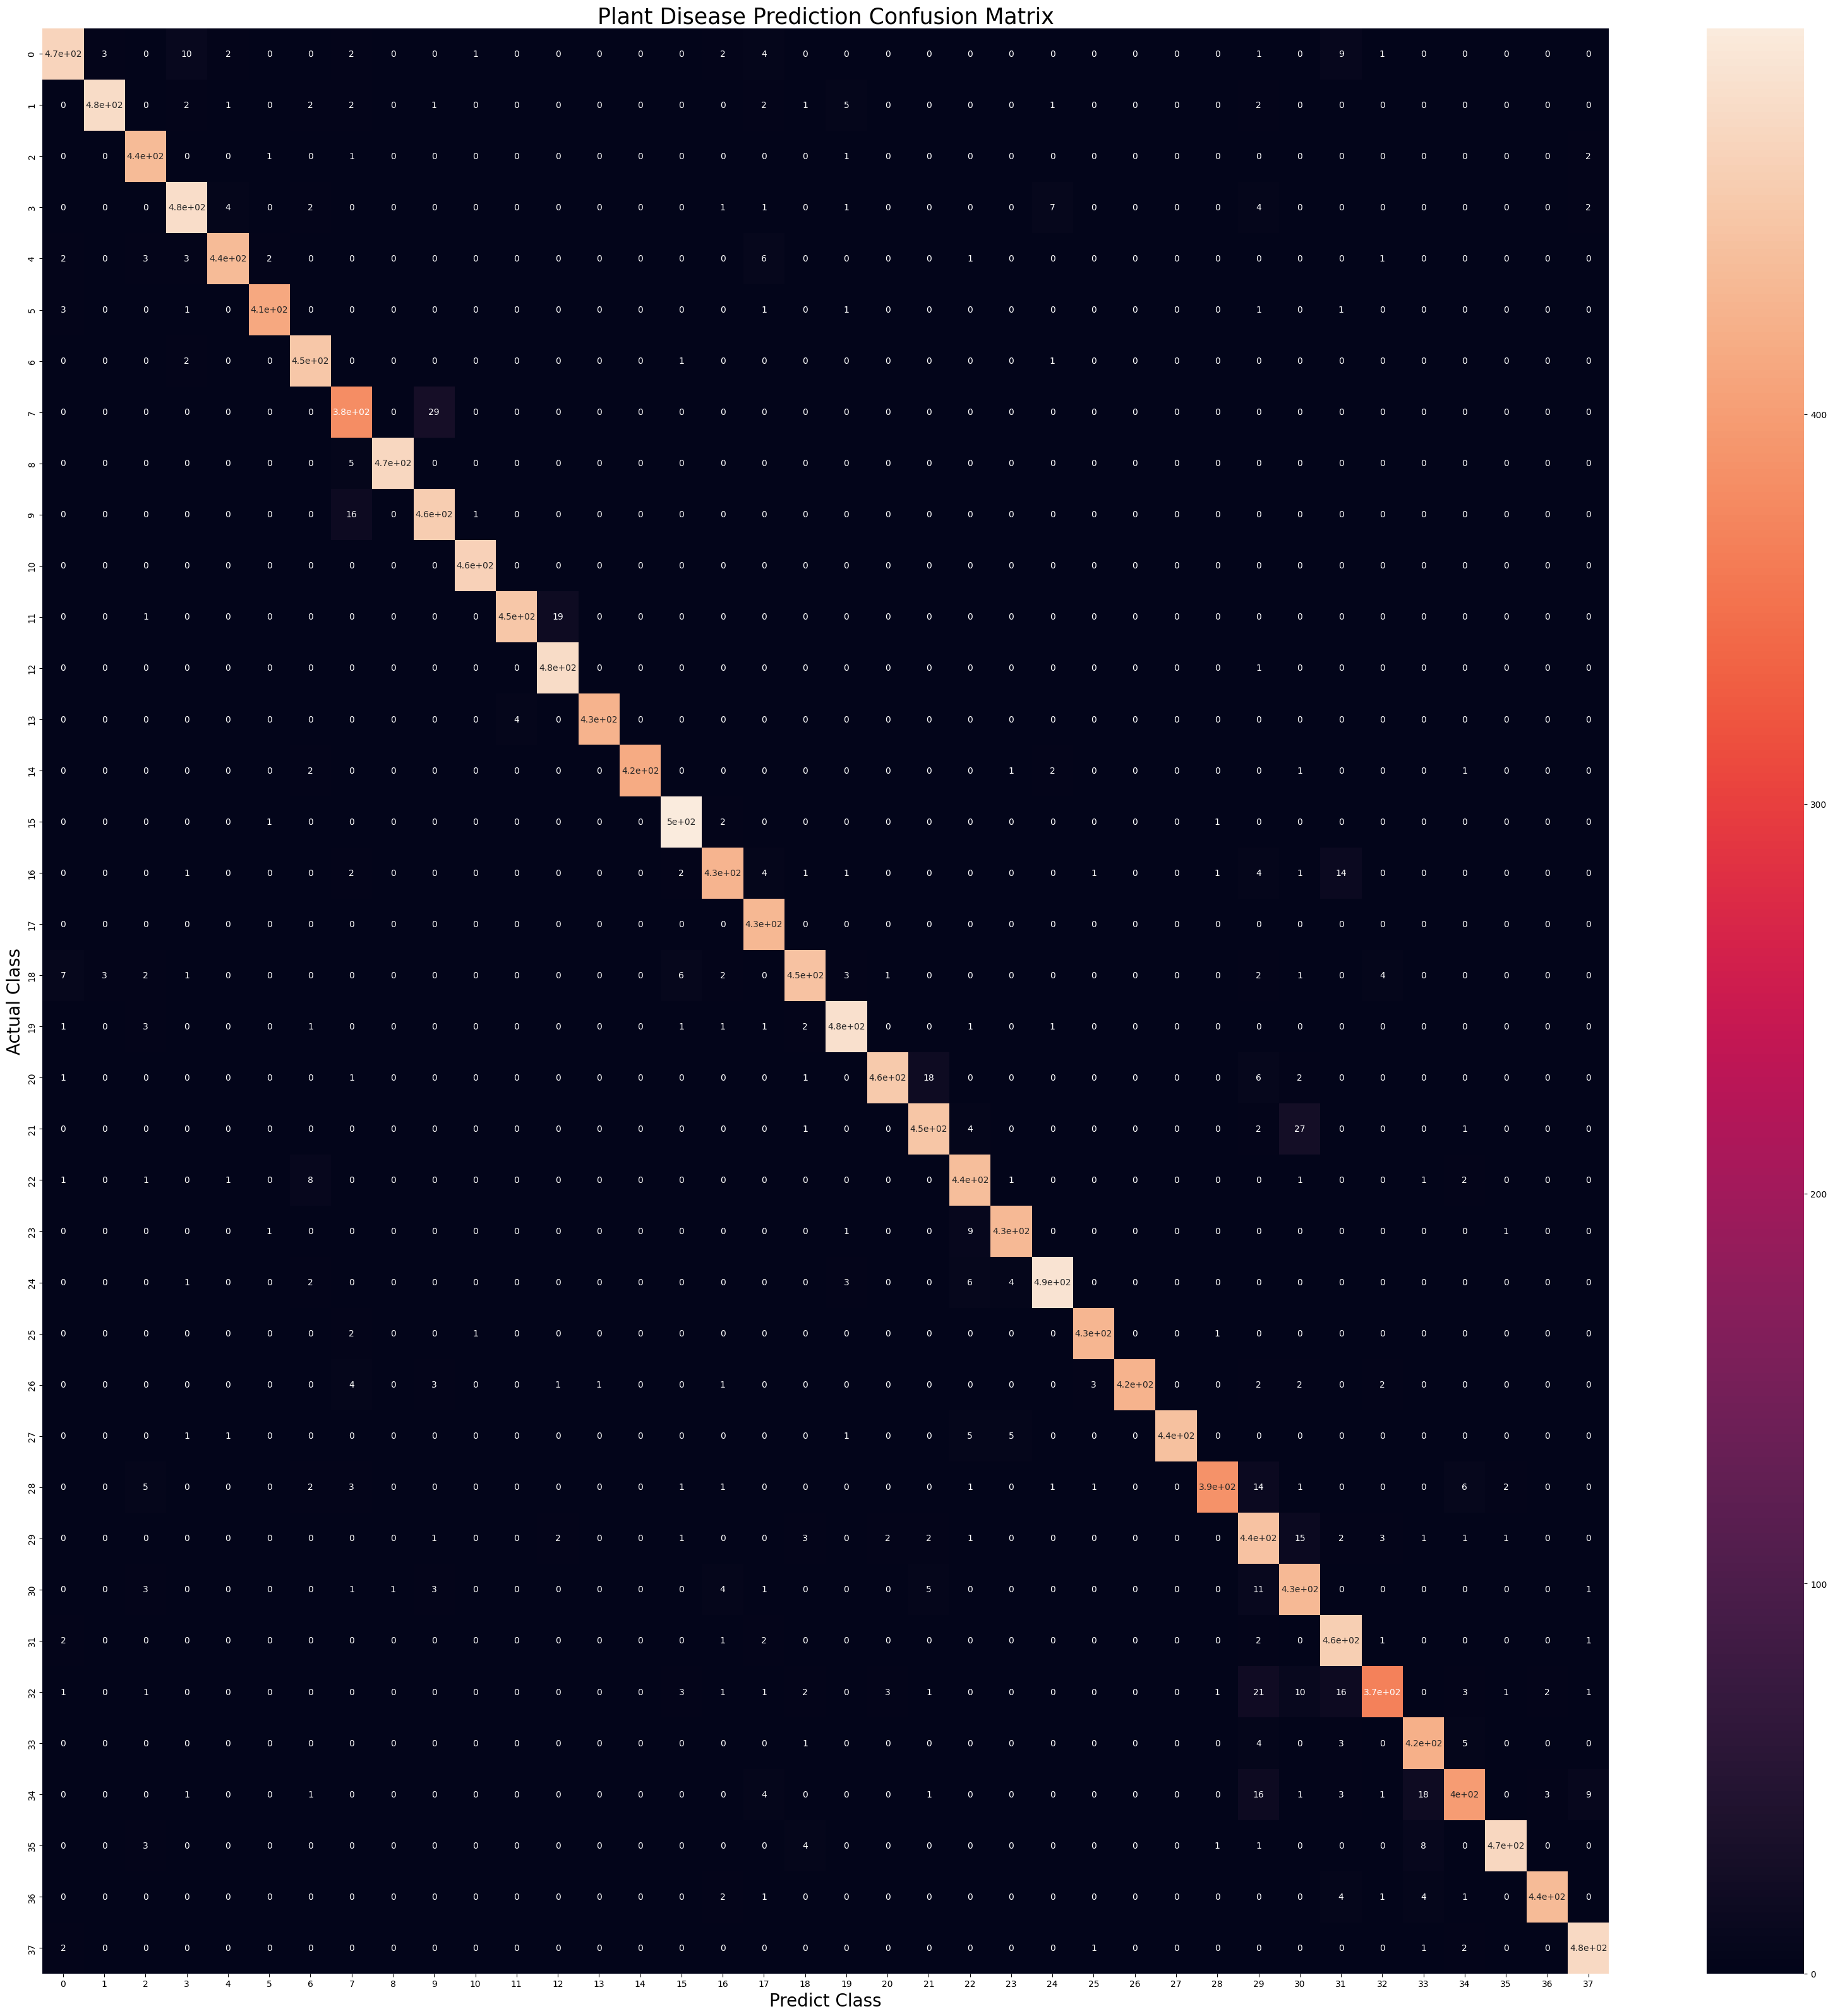

In [ ]:
### Confusion Matrix Visulaization

plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={"size":10})

plt.xlabel('Predict Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()


In [ ]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [ ]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

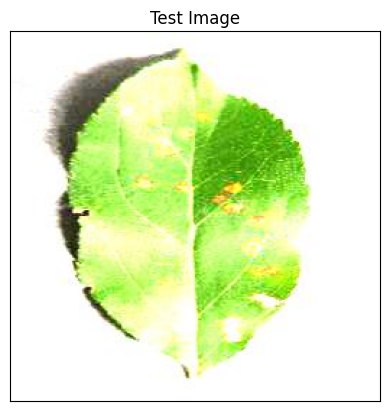

In [ ]:
#Test Image Visualization
import cv2
image_path = 'test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()


In [ ]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 230ms/step


In [ ]:
print(predictions)

[[2.1220992e-09 1.8575742e-12 9.9999952e-01 1.4319710e-12 3.2008066e-10
  4.7466270e-10 2.8389891e-13 2.7922134e-10 1.7712820e-13 1.9201413e-11
  6.7338166e-15 9.5700965e-12 1.9194702e-12 3.2174071e-13 8.0370779e-12
  1.3833588e-10 1.5876384e-11 1.2692270e-12 1.9475390e-11 6.0569258e-11
  3.0545233e-13 2.5769420e-11 8.9186948e-12 2.1783256e-11 2.5612186e-14
  1.1319276e-11 5.3783401e-12 5.2942974e-13 8.6644846e-08 3.1049814e-09
  1.3446217e-07 2.2656750e-11 2.2142021e-07 6.0282449e-13 5.2979350e-09
  4.5625690e-09 7.6371898e-10 8.5212171e-10]]


In [ ]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


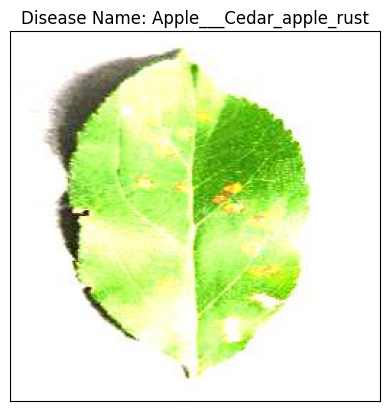

In [ ]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
cnn.save('my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('my_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>